<a href="https://colab.research.google.com/github/SeokHyeon-Hwang/programmerspython/blob/master/190227_Pra_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [기본항목 1-1, 1-3] 각 5점
캐글 또는 기본 데이터 셋을 이용하여 머신 러닝 기반 데이터 분석을 수행하고 해당 결과를 정리해서 제출해 주세요.

제출 내용 : ppt 또는 워드 문서, 소스코드 또는 github 주소 Iris 의 데이터 셋의 경우, 예측 변수는 꽃의 종류입니다.


## [머신러닝 기법 적용]
### [기본항목 2-4, 3-2] 각 5점
(가) 적절하게 데이터 셋을 나누어 머신러닝 모델에 적용시켜 주세요.


01. 데이터 불러오기

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

02. 데이터 나누기

In [0]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0
)

03. 데이터 확인하기

In [0]:
print('X_train의 크기: {}'.format(X_train.shape))
print('y_train의 크기: {}'.format(y_train.shape))

X_train의 크기: (112, 4)
y_train의 크기: (112,)


In [0]:
print('X_test 크기: {}'.format(X_test.shape))
print('y_test 크기: {}'.format(y_test.shape))

X_test 크기: (38, 4)
y_test 크기: (38,)


04. 머신러닝 모델 만들기 : KNN 분류

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# k=1인 모델 만들기
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
# 만들어진 모델을 데이터에 적용
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

05. 예측하기

In [0]:
import numpy as np

In [0]:
# 모델에 넣어볼 간단한 데이터 만들기
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [0]:
prediction = knn.predict(X_new)
print('예측: {}'.format(prediction))
print('예측한 타깃의 이름: {}'.format(
    iris['target_names'][prediction]
))

예측: [0]
예측한 타깃의 이름: ['setosa']


06. 모델 평가

In [0]:
# 모델에 실제 데이터를 넣어서 예측하기
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값:\n {}'.format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [0]:
print('테스트 세트의 정확도: {:.3f}'.format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.974


In [0]:

# knn 라이브러리 내 score함수 함수로 정확도 찍어보기
print('테스트 세트의 정확도: {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


7. 요약

In [0]:

X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0
)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('테스트 세트의 정확도: {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


### [기본항목 4-1, 4-2] 각 5점
데이터 셋 : Iris 또는 Kaggle 데이터 셋<br>
(나) 데이터 셋을 이용하여 K-means를 이용한 Clustering를 수행해 보자.<br>
(다) 이에 대한 최적의 K를 찾고 그래프로 이를 시각화를 수행해 보자.


01. 라이브러리 불러오기

In [0]:
#!pip install mglearn

    100% |████████████████████████████████| 542kB 19.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

02. 클러스터링

In [0]:
from sklearn.cluster import KMeans

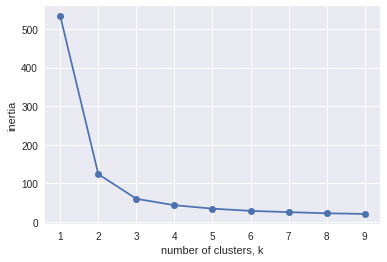

In [0]:
# 군집 모델 만들기 01

ks = range(1, 10)
inertias =[]

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(X_train)
  inertias.append(model.inertia_)
  
# Plot ks vs inertia
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

* Inertia value는 군집화 후 각 중심점에서 군집 데이터간의 거리를 합산한 것. 이 값이 작을 수록 응집도가 높다.<br>
* 위 그래프에서 inertia value의 기울기가 급격하다가 완만하게 변하는 지점인 k=3이 우리가 이미 알고 있듯 가장 좋은 결과를 보여준다.

In [0]:
# 군집 모델 만들기 02
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
# 레이블 확인
print('클러스터 레이블:\n{}'.format(kmeans.labels_))

클러스터 레이블:
[2 2 1 0 1 0 0 2 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 0 2 2 2 2 2 1 0 0 1 2 0 0 1
 0 2 2 0 2 1 2 0 1 1 1 1 0 0 1 1 0 1 0 2 1 0 0 1 0 0 0 2 1 1 0 0 0 2 2 0 0
 2 0 1 2 1 2 0 2 0 1 0 0 1 0 1 2 2 2 1 1 2 1 0 2 1 2 0 2 2 2 2 0 0 0 1 2 1
 0]


In [0]:
# 예측
print(kmeans.predict(X_test))

[2 2 0 1 0 1 0 2 2 2 1 2 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 2 2 0 1 2 0 2 1 2 0
 2]


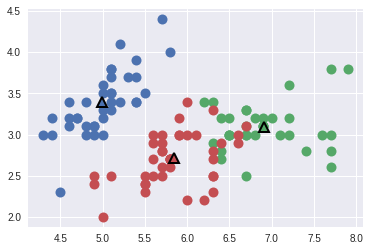

In [0]:
# 각 점 표시
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], kmeans.labels_, markers='o')

# 클러스터의 중심을 삼각형으로 표시
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    [0, 1, 2],
    markers = '^',
    markeredgewidth=2
)

# [결과 정리]

* knn 알고리즘으로 데이터를 학습시켜 테스트 데이터를 분류해본 결과 97% 정확도로 데이터를 예측해 줌을 확인 할 수 있었다.<br>

* k-means 알고리즘을 통해 군집화해보고 이를 시각화 해봄으로써 이미 알고 있듯 inertia value의 기울기가 급격하다가 완만해지는 지점은 k=3에서 군집화가 잘 됨을 확인 할 수 있었다.